____
### Basic Thomas-Fermi Mean-Ionization-State Code (Julia)
#### Michael S. Murillo
30 April 2017
____

In [39]:

using PyPlot

function TF_zbar(Z, AM, rho, T)
#====
    Finite Temperature Thomas Fermi Charge State using 
    R.M. More, "Pressure Ionization, Resonances, and the
    Continuity of Bound and Free States", Adv. in Atomic 
    Mol. Phys., Vol. 21, p. 332 (Table IV).
    
    Z = atomic number
    AM = atomic mass
    rho = density (g/cc)
    T = temperature (eV)
====#

    alpha = 14.3139
    beta = 0.6624
    a1 = 0.003323
    a2 = 0.9718
    a3 = 9.26148e-5
    a4 = 3.10165
    b0 = -1.7630
    b1 = 1.43175
    b2 = 0.31546
    c1 = -0.366667
    c2 = 0.983333
    
    R = rho/(Z*AM)
    T0 = T/Z^(4./3.)
    Tf = T0/(1+T0)
    A = a1*T0^a2+a3*T0^a4
    B = -exp(b0+b1*Tf+b2*Tf^7)
    C = c1*Tf+c2
    Q1 = A*R^B
    Q = (R^C+Q1^C)^(1/C)
    x = alpha*Q^beta

    Z*x/(1 + x + sqrt(1 + 2.*x))
end

TF_zbar (generic function with 1 method)

In [41]:
# You can get one value fairly easily.
TF_zbar(13,27,3,10)

3.0694863933632592

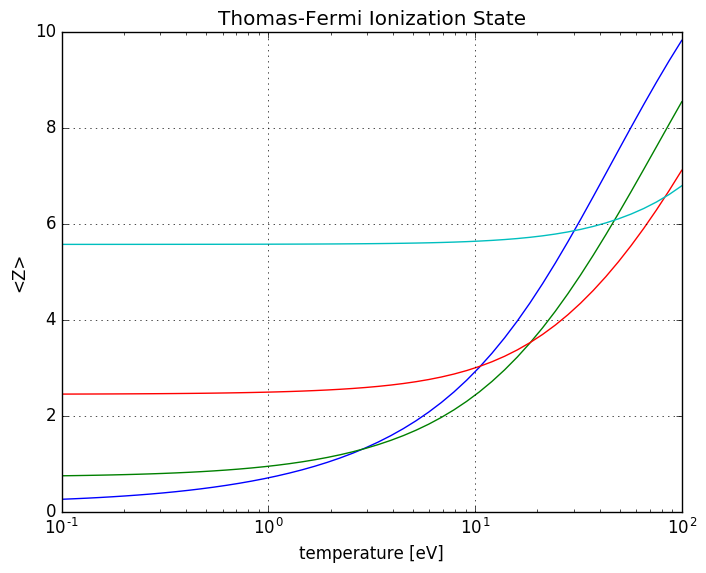

In [38]:
Z = 13
A = 27
T_min = -1 # log scale
T_max = 2
Z_nuclear = 13
atomic_mass = 26
densities = [0.027, 0.27, 2.7, 27]
temperatures = logspace(T_min, T_max)

for dens in densities
    zbars = []
    for temp in temperatures
      append!(zbars,TF_zbar(Z, A, dens, temp))
    end 
    semilogx(temperatures, zbars)
end

xlabel("temperature [eV]")
ylabel("<Z>")
title("Thomas-Fermi Ionization State")
grid("on")